In [1]:
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
#from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
train = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
std = train['NU_NOTA_MT']
std.describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [5]:
def clean_dataset(df):
    for i in df.keys().tolist():
        df[i] = df[i].replace(np.nan, -1000)
        df[i] = df[i].replace(np.inf, 0)
    return df

In [6]:
def clean_lines(df):
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [32]:
def sexo_dataset(df):
    df['TP_SEXO'] = df['TP_SEXO'].replace('F', 10)
    df['TP_SEXO'] = df['TP_SEXO'].replace('M', 3)
    return df

In [8]:
def clean_test_dataset(df):
    indices_to_keep = df.isin([np.nan, np.inf, -np.inf])
    df[indices_to_keep] = -1
    return df.astype(np.float64)

In [9]:
def nan_indeces(df):
    indices = df.isin([np.nan])
    return indices

In [10]:
def nan_data(df):
    indices_to_keep = df.isin([-1000])
    df[indices_to_keep] = np.nan
    return df

In [11]:
def error_rate(df):
    for i in df['NU_NOTA_MT'].index.tolist():
        if df['NU_NOTA_MT'][i] < 0:
            df['NU_NOTA_MT'][i] = np.nan
    return df

In [55]:
r = pd.concat([train['NU_IDADE'], train['NU_NOTA_CN'],train['NU_NOTA_CH']], axis=1)
r = pd.concat([r, train['NU_NOTA_LC'], train['TP_LINGUA']], axis=1) 
r = pd.concat([r, train['NU_NOTA_REDACAO']], axis=1)
#r = pd.concat([r, train['NU_NOTA_COMP1']], axis=1) # , train['TP_STATUS_REDACAO']
#r = pd.concat([r, train['NU_NOTA_COMP2'], train['NU_NOTA_COMP3']], axis=1)
#r = pd.concat([r, train['NU_NOTA_COMP4'], train['NU_NOTA_COMP5']], axis=1)
r = pd.concat([r, train['TP_SEXO']], axis=1)
r = pd.concat([r, train['TP_COR_RACA']], axis=1)
r = pd.concat([r, train['TP_NACIONALIDADE']], axis=1)
r = pd.concat([r, train['TP_ST_CONCLUSAO']], axis=1)
r = pd.concat([r, train['TP_ANO_CONCLUIU']], axis=1)
r = pd.concat([r, train['TP_ESCOLA']], axis=1)
r = pd.concat([r, train['IN_TREINEIRO']], axis=1)
r = pd.concat([r, train['IN_CEGUEIRA']], axis=1)
r = pd.concat([r, train['IN_SURDEZ']], axis=1)
r = pd.concat([r, train['IN_DISLEXIA']], axis=1)
r = pd.concat([r, train['IN_SABATISTA']], axis=1)
r = pd.concat([r, train['IN_DISCALCULIA']], axis=1)
r = pd.concat([r, train['IN_GESTANTE']], axis=1)
r = pd.concat([r, train['IN_IDOSO']], axis=1)
r = pd.concat([r, train['NU_NOTA_MT']], axis=1)

r.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,...,TP_ESCOLA,IN_TREINEIRO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_SABATISTA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO,NU_NOTA_MT
0,24,436.3,495.4,581.2,1,520.0,M,1,1,1,...,1,0,0,0,0,0,0,0,0,399.4
1,17,474.5,544.1,599.0,1,580.0,F,3,1,2,...,2,0,0,0,0,0,0,0,0,459.8
2,21,NaN,NaN,NaN,1,NaN,F,3,1,3,...,1,0,0,0,0,0,0,0,0,NaN
3,25,NaN,NaN,NaN,0,NaN,F,0,1,1,...,1,0,0,0,0,0,0,0,0,NaN
4,28,NaN,NaN,NaN,1,NaN,M,2,1,1,...,1,0,0,0,0,0,0,0,0,NaN


In [50]:
r.keys().tolist()

['NU_IDADE',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'NU_NOTA_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'IN_TREINEIRO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_SABATISTA',
 'IN_DISCALCULIA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'NU_NOTA_MT']

In [56]:
r = sexo_dataset(r)
r['TP_SEXO'].head()

0     3
1    10
2    10
3    10
4     3
Name: TP_SEXO, dtype: int64

In [57]:
#r = clean_dataset(r)
r_clean = clean_lines(r)
r_clean.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,...,TP_ESCOLA,IN_TREINEIRO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_SABATISTA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO,NU_NOTA_MT
0,24.0,436.3,495.4,581.2,1.0,520.0,3.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.4
1,17.0,474.5,544.1,599.0,1.0,580.0,10.0,3.0,1.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459.8
5,18.0,439.7,583.2,410.9,0.0,620.0,10.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.5
6,18.0,420.1,604.2,484.5,0.0,560.0,10.0,3.0,1.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.2
7,18.0,619.6,625.8,611.2,0.0,620.0,10.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,566.7


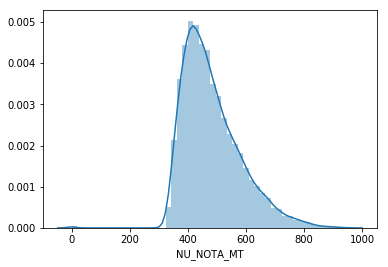

In [20]:
sns.distplot(r_clean['NU_NOTA_MT']);

In [115]:
r_clean['NU_NOTA_MT'].describe()


count    10097.000000
mean       482.648638
std         99.685820
min          0.000000
25%        409.000000
50%        461.300000
75%        537.700000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [58]:
x = r_clean.drop('NU_NOTA_MT', axis = 1)
x.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_SABATISTA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO
0,24.0,436.3,495.4,581.2,1.0,520.0,3.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.0,474.5,544.1,599.0,1.0,580.0,10.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,18.0,439.7,583.2,410.9,0.0,620.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,18.0,420.1,604.2,484.5,0.0,560.0,10.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18.0,619.6,625.8,611.2,0.0,620.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
pre = pd.concat([teste['NU_IDADE'], teste['NU_NOTA_CN'],teste['NU_NOTA_CH']], axis=1)
pre = pd.concat([pre, teste['NU_NOTA_LC'], teste['TP_LINGUA']], axis=1) 
pre = pd.concat([pre, teste['NU_NOTA_REDACAO']], axis=1)
#pre = pd.concat([pre, teste['NU_NOTA_COMP1']], axis=1) # , train['TP_STATUS_REDACAO']
#pre = pd.concat([pre, teste['NU_NOTA_COMP2'], teste['NU_NOTA_COMP3']], axis=1)
#pre = pd.concat([pre, teste['NU_NOTA_COMP4'], teste['NU_NOTA_COMP5']], axis=1)
pre = pd.concat([pre, teste['TP_SEXO']], axis=1)
pre = pd.concat([pre, teste['TP_COR_RACA']], axis=1)
pre = pd.concat([pre, teste['TP_NACIONALIDADE']], axis=1)
pre = pd.concat([pre, teste['TP_ST_CONCLUSAO']], axis=1)
pre = pd.concat([pre, teste['TP_ANO_CONCLUIU']], axis=1)
pre = pd.concat([pre, teste['TP_ESCOLA']], axis=1)
pre = pd.concat([pre, teste['IN_TREINEIRO']], axis=1)
pre = pd.concat([pre, teste['IN_CEGUEIRA']], axis=1)
pre = pd.concat([pre, teste['IN_SURDEZ']], axis=1)
pre = pd.concat([pre, teste['IN_DISLEXIA']], axis=1)
pre = pd.concat([pre, teste['IN_SABATISTA']], axis=1)
pre = pd.concat([pre, teste['IN_DISCALCULIA']], axis=1)
pre = pd.concat([pre, teste['IN_GESTANTE']], axis=1)
pre = pd.concat([pre, teste['IN_IDOSO']], axis=1)
#pre = pd.concat([pre, teste['NU_NOTA_MT']], axis=1)

pre.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_SABATISTA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO
0,22,464.8,443.5,431.8,0,420.0,F,3,1,1,5,1,0,0,0,0,0,0,0,0
1,26,391.1,491.1,548.0,1,580.0,F,3,1,1,8,1,0,0,0,0,0,0,0,0
2,21,595.9,622.7,613.6,0,320.0,M,1,1,2,0,2,0,0,0,0,0,0,0,0
3,27,NaN,NaN,NaN,0,NaN,F,3,1,1,8,1,0,0,0,0,0,0,0,0
4,18,592.9,492.6,571.4,1,320.0,M,1,1,2,0,2,0,0,0,0,0,0,0,0


In [60]:
pre = sexo_dataset(pre)
pre_clean = clean_lines(pre)
pre_clean.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_SABATISTA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO
0,22.0,464.8,443.5,431.8,0.0,420.0,10.0,3.0,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26.0,391.1,491.1,548.0,1.0,580.0,10.0,3.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,595.9,622.7,613.6,0.0,320.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,592.9,492.6,571.4,1.0,320.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,18.0,414.5,568.5,542.5,1.0,560.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [582]:
I_can_do_it = MLPRegressor()
I_can_do_it.fit(x, r_clean['NU_NOTA_MT'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [583]:
predictions = I_can_do_it.predict(pre_clean)
predictions[:7]

array([441.97175824, 434.94351   , 581.409431  , 538.51969572,
       469.95695771, 547.65965451, 442.93458095])

In [571]:
aaa = KNeighborsRegressor()
aaa.fit(x, r_clean['NU_NOTA_MT'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [572]:
predictions = aaa.predict(pre_clean)
predictions[:7]

array([545.4 , 406.7 , 522.22, 484.74, 465.88, 483.7 , 466.5 ])

In [519]:
them = TheilSenRegressor()
them.fit(x, r_clean['NU_NOTA_MT'])

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [520]:
predictions = them.predict(pre_clean)
predictions[:5]

array([449.08967614, 437.55695506, 581.86597652, 527.34027862,
       460.63687466])

In [509]:
rank = RANSACRegressor()
rank.fit(x, r_clean['NU_NOTA_MT'])

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [510]:
predictions = rank.predict(pre_clean)
predictions[:5]

array([439.61127408, 402.48861253, 758.21736266, 607.64075243,
       427.15609403])

In [37]:
sinapse = HuberRegressor()
sinapse.fit(x, r_clean['NU_NOTA_MT'])

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [38]:
predictions = sinapse.predict(pre_clean)
predictions[:5]

array([427.18678433, 442.42036632, 612.45869724, 557.94126252,
       468.8715999 ])

In [480]:
Hundred = ExtraTreesRegressor()
Hundred.fit(x, r_clean['NU_NOTA_MT'])

c:\users\aliss\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [481]:
predictions = Hundred.predict(pre_clean)
predictions[:5]

array([480.08, 448.04, 645.8 , 479.68, 448.95])

In [468]:
BRhuehue = BaggingRegressor()
BRhuehue.fit(x, r_clean['NU_NOTA_MT'])

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [473]:
predictions = BRhuehue.predict(pre_clean)
predictions[:5]

array([435.48, 478.22, 547.13, 537.87, 498.48])

In [63]:
Ada = AdaBoostRegressor()
Ada.fit(x, r_clean['NU_NOTA_MT'])

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [64]:
predictions = Ada.predict(pre_clean)
predictions[:5]

array([  443.94328088,   446.02749801,   589.25      , -1000.        ,
         555.89569145])

In [411]:
Super = ExtraTreeRegressor()
Super.fit(x, r_clean['NU_NOTA_MT'])

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [412]:
predictions = Super.predict(pre_clean)
predictions[:5]

array([565.8, 378.9, 416.8, 635.7, 456.2])

In [400]:
DTR = DecisionTreeRegressor()
DTR.fit(x, r_clean['NU_NOTA_MT'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [401]:
predictions = DTR.predict(pre_clean)
predictions[:5]

array([416.1, 461.8, 752.5, 649.9, 522.3])

In [373]:
GDR = SGDRegressor()
GDR.fit(x, r_clean['NU_NOTA_MT'])

c:\users\aliss\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [375]:
predictions = GDR.predict(pre_clean)
predictions[:5]

array([3.95440772e+14, 4.27369042e+14, 4.26845506e+14, 4.33465163e+14,
       4.41184467e+14])

In [361]:
ARDR = PassiveAggressiveRegressor()
ARDR.fit(x, r_clean['NU_NOTA_MT'])

c:\users\aliss\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
              epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, n_iter_no_change=5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [363]:
predictions = ARDR.predict(pre_clean)
predictions[:5]

array([452.51545911, 459.65690888, 620.20553837, 569.1256774 ,
       487.67663788])

In [95]:
rfm = RandomForestRegressor()
rfm.fit(x, r_clean['NU_NOTA_MT'])

c:\users\aliss\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
predictions = rfm.predict(pre_clean)

In [97]:
predictions[:5]

array([  427.41,   435.12,   596.06, -1000.  ,   542.32])

In [420]:
TT = TransformedTargetRegressor()
TT.fit(x, r_clean['NU_NOTA_MT'])
#|TT
 #^

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
              regressor=None, transformer=None)

In [421]:
predictions = TT.predict(pre_clean)
predictions[:5]

array([443.19129293, 434.66048103, 583.39695338, 533.68290835,
       464.3275066 ])

In [303]:
lm.fit(x, r_clean['NU_NOTA_MT'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [306]:
predictions = lm.predict(pre_clean)
print(predictions)

[443.19129293 434.66048103 583.39695338 ... 460.36156001 621.04345318
 448.36156001]


In [61]:
arion = GradientBoostingRegressor(max_depth=3)
arion.fit(x, r_clean['NU_NOTA_MT'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
predictions = arion.predict(pre_clean)
predictions[:5]

array([431.12461084, 449.6376485 , 595.7364145 , 555.53686984,
       488.26469816])

## resposta

In [63]:
resposta = pd.concat([teste['NU_INSCRICAO']], axis=1)
resposta.head()

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934


In [64]:
pontos = pd.concat([teste['NU_INSCRICAO']], axis=1)
pontos["NU_NOTA_MT"] = np.nan
del pontos['NU_INSCRICAO']
pontos.head()

,NU_NOTA_MT
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [65]:
list_p = list(predictions)
list_p[:5]

[431.1246108382067,
 449.63764849672935,
 595.73641450366,
 555.5368698406462,
 488.264698160692]

In [66]:
contador = 0

for index in pre_clean.index:
    pontos.loc[[index]] = list_p[contador]
    contador = contador + 1
pontos.head()

,NU_NOTA_MT
0,431.124611
1,449.637648
2,595.736415
3,NaN
4,555.536870


In [67]:
resposta = pd.concat([resposta, pontos], axis=1)
#resposta = nan_data(resposta)
resposta.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,431.124611
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,449.637648
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.736415
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,555.536870


In [68]:
resposta.to_csv('answer.csv', index=False)

In [126]:
#resposta = error_rate(resposta)